# Natural Language Processing

## Ingestion

In [62]:
!pip install --upgrade pip
!pip -q install boto3

Requirement already up-to-date: pip in c:\users\xinyan\anaconda3\lib\site-packages (19.0.3)


In [63]:
import pandas as pd
import json 
import os #set credentials to enviroment 

#AWS Comprehend
import boto3


#Benchmark
from sklearn.metrics import confusion_matrix

In [64]:
yelp_df = pd.read_csv('https://raw.githubusercontent.com/Zhenyu0521/Machine-Learning/master/NLP/yelp.csv')
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [145]:
yelp_text = yelp_df[['stars', 'text']].dropna()[0:100]
yelp_text.head()

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...


# AWS Comprehend

### Create API Config

In [66]:
comprehend = boto3.client(service_name='comprehend')

In [67]:
# hello world sentiment analysis API
text = "It is raining today in Seattle"
print('Calling DetectSentiment')
print(json.dumps(comprehend.detect_sentiment(Text=text, LanguageCode='en'), sort_keys=True, indent=4))
print('End of DetectSentiment\n')

Calling DetectSentiment
{
    "ResponseMetadata": {
        "HTTPHeaders": {
            "content-length": "164",
            "content-type": "application/x-amz-json-1.1",
            "date": "Thu, 14 Mar 2019 23:59:12 GMT",
            "x-amzn-requestid": "2a7cd6a8-46b5-11e9-92c0-9b5905cb711c"
        },
        "HTTPStatusCode": 200,
        "RequestId": "2a7cd6a8-46b5-11e9-92c0-9b5905cb711c",
        "RetryAttempts": 0
    },
    "Sentiment": "NEUTRAL",
    "SentimentScore": {
        "Mixed": 0.0029508057050406933,
        "Negative": 0.003515031188726425,
        "Neutral": 0.8899842500686646,
        "Positive": 0.10354989022016525
    }
}
End of DetectSentiment



In [68]:
def get_sentiment(text):
  try:
    res = comprehend.detect_sentiment(Text=text, LanguageCode='en')["Sentiment"]
    return res
  except: 
    return None

In [69]:
def get_senti_score(text):
  try:
    scores = comprehend.detect_sentiment(Text=text, LanguageCode='en')["SentimentScore"]
    return scores
  except: 
    return None

In [146]:
yelp_text["text"].astype(str)

yelp_text["AWS_sentiment"] =yelp_text["text"].apply(lambda x: get_sentiment(x))
yelp_text["AWS_sentimentscore"] =yelp_text["text"].apply(lambda x: get_senti_score(x))

In [147]:
yelp_text.head()

,stars,text,AWS_sentiment,AWS_sentimentscore
0,5,My wife took me here on my birthday for breakf...,POSITIVE,"{'Positive': 0.9990376234054565, 'Negative': 1..."
1,5,I have no idea why some people give bad review...,POSITIVE,"{'Positive': 0.6780439615249634, 'Negative': 0..."
2,4,love the gyro plate. Rice is so good and I als...,POSITIVE,"{'Positive': 0.9993359446525574, 'Negative': 4..."
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",POSITIVE,"{'Positive': 0.9864616990089417, 'Negative': 0..."
4,5,General Manager Scott Petello is a good egg!!!...,POSITIVE,"{'Positive': 0.9404304027557373, 'Negative': 0..."


In [148]:
yelp_text.tail()

,stars,text,AWS_sentiment,AWS_sentimentscore
95,5,Awesome subs clean and friendly well priced.,POSITIVE,"{'Positive': 0.9854689240455627, 'Negative': 0..."
96,4,"Had dinner and brunch, not on the same day...t...",MIXED,"{'Positive': 0.1926969736814499, 'Negative': 0..."
97,4,This is a very interesting place. Don't go he...,POSITIVE,"{'Positive': 0.7743750810623169, 'Negative': 0..."
98,5,I LOVE Chic Nails!\n\nI used to go to Tip & To...,POSITIVE,"{'Positive': 0.9920309782028198, 'Negative': 9..."
99,5,"After the Padres Spring Training game, we had ...",POSITIVE,"{'Positive': 0.6912446618080139, 'Negative': 0..."


# GCP Cloud Natural Language

In [73]:
!pip install --upgrade -q google-cloud-language

In [74]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/xinyan/Documents/ML 452 GCP NLP-a5d14ab3f7de.json"

In [75]:
# Imports the Google Cloud client library 
from google.cloud import language
from google.cloud import language_v1
from google.cloud.language import types
from google.cloud.language_v1 import enums
import six

In [76]:
def gcp_sentiment(content):

    client = language_v1.LanguageServiceClient()

    # content = 'Your text to analyze, e.g. Hello, world!'

    if isinstance(content, six.binary_type):
        content = content.decode('utf-8')

    type_ = enums.Document.Type.PLAIN_TEXT
    document = {'type': type_, 'content': content}

    response = client.analyze_sentiment(document)
    sentiment = response.document_sentiment.score
#     return sentiment
    return(sentiment)

In [149]:
yelp_text["GCP_sentimentscore"] = yelp_text["text"].apply(lambda x:gcp_sentiment(x))

In [150]:
yelp_text.head()

,stars,text,AWS_sentiment,AWS_sentimentscore,GCP_sentimentscore
0,5,My wife took me here on my birthday for breakf...,POSITIVE,"{'Positive': 0.9990376234054565, 'Negative': 1...",0.6
1,5,I have no idea why some people give bad review...,POSITIVE,"{'Positive': 0.6780439615249634, 'Negative': 0...",0.2
2,4,love the gyro plate. Rice is so good and I als...,POSITIVE,"{'Positive': 0.9993359446525574, 'Negative': 4...",0.8
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",POSITIVE,"{'Positive': 0.9864616990089417, 'Negative': 0...",0.3
4,5,General Manager Scott Petello is a good egg!!!...,POSITIVE,"{'Positive': 0.9404304027557373, 'Negative': 0...",0.5


In [151]:
yelp_text.loc[ yelp_text["GCP_sentimentscore"] < 0.0, 'GCP_sentiment' ] = 'NEGATIVE'
yelp_text.loc[ yelp_text["GCP_sentimentscore"] > 0.0, 'GCP_sentiment' ] = 'POSITIVE'
yelp_text.loc[ yelp_text["GCP_sentimentscore"] == 0.0, 'GCP_sentiment' ] = 'NEUTRAL'

In [152]:
yelp_text.tail(20)

,stars,text,AWS_sentiment,AWS_sentimentscore,GCP_sentimentscore,GCP_sentiment
80,4,The vibe exuding from this place is pure aweso...,POSITIVE,"{'Positive': 0.8557027578353882, 'Negative': 0...",0.4,POSITIVE
81,4,Rokerij is worth the hype. We popped in last w...,POSITIVE,"{'Positive': 0.9457094073295593, 'Negative': 0...",0.5,POSITIVE
82,5,Beer...or Yoga?\n\nLocated in a small center j...,POSITIVE,"{'Positive': 0.9658595323562622, 'Negative': 0...",0.4,POSITIVE
83,4,Great hotel in Central Phoenix for a stay-cati...,POSITIVE,"{'Positive': 0.938581645488739, 'Negative': 0....",0.8,POSITIVE
84,1,"really, I can't believe this place has receive...",NEGATIVE,"{'Positive': 0.03934992849826813, 'Negative': ...",-0.2,NEGATIVE
85,4,"Great place to have a meal with family, can be...",POSITIVE,"{'Positive': 0.8168639540672302, 'Negative': 0...",0.9,POSITIVE
86,5,Figured it is time to write a review after goi...,POSITIVE,"{'Positive': 0.9416853785514832, 'Negative': 0...",0.7,POSITIVE
87,4,I was only able to play the front 9; my wrist ...,POSITIVE,"{'Positive': 0.8811421394348145, 'Negative': 0...",0.3,POSITIVE
88,5,I can't describe to you how amazing these gour...,POSITIVE,"{'Positive': 0.9883948564529419, 'Negative': 0...",0.9,POSITIVE
89,1,"I was really excited about this event, maybe m...",NEGATIVE,"{'Positive': 0.031495314091444016, 'Negative':...",-0.2,NEGATIVE


# Comparision

## confusion matrix

In [153]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [154]:
# Predict the values from the validation dataset
Y_aws=yelp_text['AWS_sentiment']

# Convert validation observations to one hot vectors
Y_gcp = yelp_text['GCP_sentiment']
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_gcp, Y_aws) 


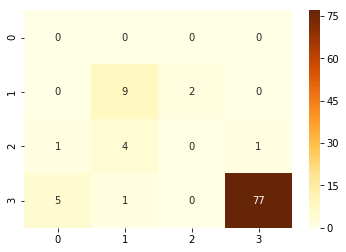

In [155]:
# classes= ['MIXED','NEGATIVE','NEUTRAL','POSITIVE']
sns.heatmap(confusion_mtx,annot=True,cmap='YlOrBr')

## visualization

####  AWS

C:\Users\xinyan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: can't multiply sequence by non-int of type 'float'

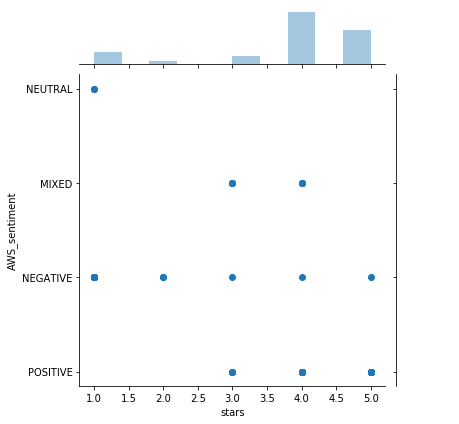

In [156]:
sns.jointplot(x='stars', y='AWS_sentiment', data=yelp_text)

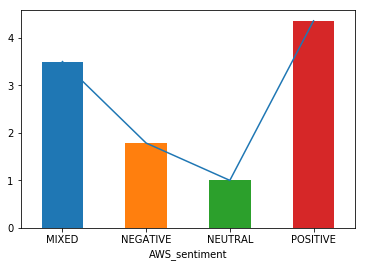

In [157]:
aws_groupby = yelp_text.groupby(['AWS_sentiment']).mean()['stars']
aws_groupby.plot.bar(stacked=True)
aws_groupby.plot.line()

#### GCP

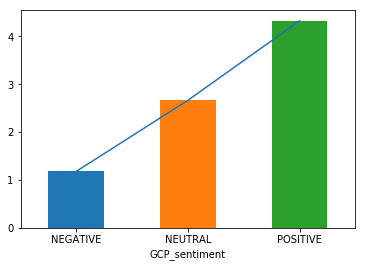

In [158]:
gcp_groupby = yelp_text.groupby(['GCP_sentiment']).mean()['stars']
gcp_groupby.plot.bar(stacked=True)
gcp_groupby.plot.line()

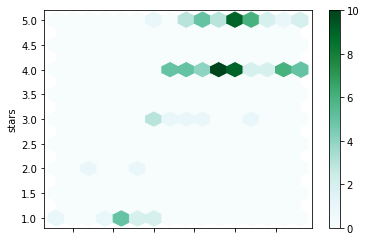

In [159]:
yelp_text.plot.hexbin(x='GCP_sentimentscore', y='stars', gridsize=15)